theta values  [ 17.39632983 -16.33716815 -24.37862612]


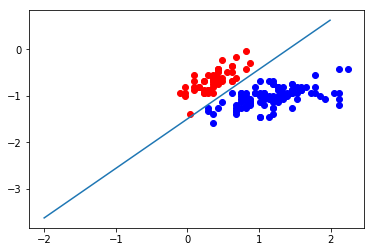

In [17]:
import numpy as np

import math
import random
import matplotlib.pyplot as plt
from sklearn import datasets as skdata

theta=[]
#calculate sigmoid func
def sigmoid(theta, x):
    return (1/(1+np.exp(-np.dot(x,theta))))
    
#calculate gradient
def log_gradient(theta, x, y):
    first_calc = sigmoid(theta, x) -y
    final_calc = first_calc.T.dot(x)
    return final_calc

              

def addbias(data):
    return np.hstack([data,np.ones([data.shape[0],1])])

def cost_func(theta,x,y):
    
    return np.mean(-y*np.log(sigmoid(theta,x))-(1-y)*np.log(1 - sigmoid(theta,x)))
    

def standardize(data):
    mean= np.mean(data)
    std = np.std(data)
    xStd = (data-mean)/std
    return xStd

def initalTheta():
    for i in range(3):
        theta.append(random.uniform(-1,1))
    return theta

def main():
           
    
    iris=skdata.load_iris()
    X=iris.data[:, :2]
    Y=(iris.target!=0)*1
    X=standardize(X)
    xt=X.transpose()
    X=addbias(X)
    
    theta=initalTheta()
    theta=np.array(theta)
    
    sig = sigmoid(theta,X)
    
    pr=1
    
    itr = 0
    lr = 0.01
    N = len(X)
    lossOfData0 = 1
    while(itr<10000 and pr>2**-23):       
        lossOfData = cost_func(theta,X,Y)
        pr=np.abs(lossOfData0-lossOfData)
        theta = theta - (lr * log_gradient(theta, X, Y))
        itr += 1
#plot graph

    print("theta values ",theta) 
    my_x = np.arange(-2, 2, 0.01)
   
    my_m = -1 * theta[0] / theta[1]
    my_b = -1 * theta[2] / theta[1]
   
    my_y = my_m * my_x + my_b
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red')
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue')
    plt.plot(my_x, my_y)
    plt.show()
if __name__ == '__main__':
    main()

/Users/harshpathak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


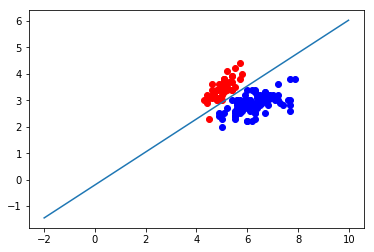

In [15]:
#verification 
from sklearn import datasets as skdata
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def standardize(data):
    mean= np.mean(data)
    std = np.std(data)
    xStd = (data-mean)/std
    return xStd

iris=skdata.load_iris()
X=iris.data[:, :2]
Y=(iris.target!=0)*1
lgr=LogisticRegression()
a=lgr.fit(X,Y)
my_x = np.arange(-2, 10, 0.01)
   
my_m = -1 * a.coef_[0,0]/a.coef_[0,1]
my_b = -1 * a.intercept_[0]/a.coef_[0,1]
my_y = my_m * my_x + my_b
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='red')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue')
plt.plot(my_x, my_y)
plt.show()